<a href="https://colab.research.google.com/github/susmithapatchigolla/Dental-X-Ray-Diagnosis/blob/master/dentalp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Importing Modules***

In [0]:
import pandas as pd
import numpy as np

In [0]:
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dropout,Dense,GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
training_data_generator = ImageDataGenerator()

## ***Uploading the Dataset***

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dental.zip to dental.zip


## ***UnZipping the Data set***


In [0]:
!unzip dental.zip

Archive:  dental.zip
   creating: dental/
   creating: dental/ncaries/
  inflating: dental/ncaries/p176.JPG  
  inflating: dental/ncaries/p177.JPG  
  inflating: dental/ncaries/p179.JPG  
  inflating: dental/ncaries/p182.JPG  
  inflating: dental/ncaries/p192.JPG  
  inflating: dental/ncaries/p194.JPG  
  inflating: dental/ncaries/p199.JPG  
  inflating: dental/ncaries/p200.JPG  
  inflating: dental/ncaries/p201.JPG  
  inflating: dental/ncaries/p202.JPG  
  inflating: dental/ncaries/p203.JPG  
  inflating: dental/ncaries/p206.JPG  
  inflating: dental/ncaries/p207.JPG  
  inflating: dental/ncaries/p209.JPG  
  inflating: dental/ncaries/p210.JPG  
  inflating: dental/ncaries/p211.JPG  
  inflating: dental/ncaries/p217.JPG  
  inflating: dental/ncaries/p219.JPG  
  inflating: dental/ncaries/p227.JPG  
  inflating: dental/ncaries/p228.JPG  
  inflating: dental/ncaries/p229.JPG  
  inflating: dental/ncaries/p232.JPG  
  inflating: dental/ncaries/p233.JPG  
  inflating: dental/ncaries/p234

## ***Uploading Validation Data Set***

In [0]:
from google.colab import files
uploaded = files.upload()

Saving validation.zip to validation.zip


# ***UnZipping Validation Data Set***

In [0]:
!unzip validation.zip

Archive:  validation.zip
   creating: validation/
   creating: validation/ncaries/
  inflating: validation/ncaries/p601.JPG  
  inflating: validation/ncaries/p603.JPG  
  inflating: validation/ncaries/p604.JPG  
  inflating: validation/ncaries/p605.JPG  
  inflating: validation/ncaries/p606.JPG  
  inflating: validation/ncaries/p608.JPG  
  inflating: validation/ncaries/p609.JPG  
  inflating: validation/ncaries/p610.JPG  
  inflating: validation/ncaries/p615.JPG  
  inflating: validation/ncaries/p617.JPG  
  inflating: validation/ncaries/p619.JPG  
  inflating: validation/ncaries/p621.JPG  
  inflating: validation/ncaries/p622.JPG  
  inflating: validation/ncaries/p623.JPG  
  inflating: validation/ncaries/p624.JPG  
  inflating: validation/ncaries/p625.JPG  
  inflating: validation/ncaries/p626.JPG  
  inflating: validation/ncaries/p628.JPG  
  inflating: validation/ncaries/p629.JPG  
  inflating: validation/ncaries/p631.JPG  
  inflating: validation/ncaries/p634.JPG  
  inflating: v

## ***Loading Train Dataset into train generator***

In [0]:
training_generator = training_data_generator.flow_from_directory(
    'dental/',
    target_size=(224, 224),
    batch_size=10,
    class_mode="binary")

Found 299 images belonging to 2 classes.


## ***Loading Validation Dataset into Validation Generator***

In [0]:
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow_from_directory(
   'validation/',
   target_size=(224,224),
   batch_size=10,
   class_mode='binary')

Found 242 images belonging to 2 classes.


## ***Training***

In [0]:
from keras.applications.mobilenet import MobileNet
model = MobileNet(depth_multiplier=1,classes=2,alpha=1.0,weights= 'imagenet', include_top=False, input_shape= (224,224,3))
x = model.output
x = GlobalAveragePooling2D()(x)
x =Dropout(0.7)(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = model.input, outputs = predictions)
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // 10,
    epochs=10,validation_data=validation_generator,validation_steps=100)

Instructions for updating:
Colocations handled automatically by placer.
17227776/17225924 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
29/29 [==============================] - 248s 9s/step - loss: 0.6181 - acc: 0.7172 - val_loss: 1.6582 - val_acc: 0.3058
Epoch 2/10
29/29 [==============================] - 241s 8s/step - loss: 0.2815 - acc: 0.8702 - val_loss: 0.9638 - val_acc: 0.3058
Epoch 3/10
29/29 [==============================] - 241s 8s/step - loss: 0.1604 - acc: 0.9448 - val_loss: 1.3816 - val_acc: 0.3058
Epoch 4/10
29/29 [==============================] - 240s 8s/step - loss: 0.0682 - acc: 0.9793 - val_loss: 0.8047 - val_acc: 0.3058
Epoch 5/10
29/29 [==============================] - 241s 8s/step - loss: 0.1303 - acc: 0.9445 - val_loss: 0.9668 - val_acc: 0.3058
Epoch 6/10
29/29 [===========================

## ***Saving the Model***

In [0]:
model.save('dentalp.h5') 



## ***Loading the model***

In [0]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('dentalp.h5')

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


## ***Uploading a picture for testing the model***

In [0]:
from io import BytesIO
from PIL import Image

In [0]:
from google.colab import files
uploaded = files.upload()

Saving p500.JPG to p500.JPG


In [0]:
im = Image.open(BytesIO(uploaded['p500.JPG']))

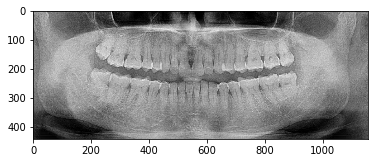

In [0]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

## ***Processing the image to fit in the model***

In [0]:
img = cv2.imread('p500.JPG')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])


## ***Prediction***

In [0]:
classes = model.predict(img)

print(classes[0][0])

0.00014826098


## ***An Another Example***

In [0]:
from google.colab import files
uploaded = files.upload()

Saving p525.JPG to p525 (1).JPG


In [0]:
im1 = Image.open(BytesIO(uploaded['p525.JPG']))

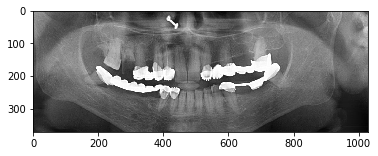

In [0]:
import matplotlib.pyplot as plt

plt.imshow(im1)
plt.show()

In [0]:
img = cv2.imread('p525.JPG')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

In [0]:
classes = model.predict(img)

print(classes[0][0])

0.99999666


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('dentalp.h5')
model_file = drive.CreateFile({'title' : 'dentalp.h5'}) 
model_file.SetContentFile('dentalp.h5')                       
model_file.Upload()

In [0]:
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1sjVsEN0jiX5Wl_YOIMjVkTKuCklUr8YB'})

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials